In [1]:
#%pip install mlxtend --user
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

# to make axis visible in dark theme
from matplotlib import style
style.use('default')

### Create data set

In [2]:
#TODO: do these values have mean=0 and std=1? And are it gaussian components?
def create_dataset(random_state=999, n_samples=100, n_dim=2):
    X, y = make_classification(                                         
        n_samples=n_samples, n_features=2, n_redundant=0, n_informative=n_dim,
        n_clusters_per_class=1, class_sep=1.0, random_state=random_state
    )
    # plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
    # print(np.mean(X[:,0]), np.std(X[:,0]))
    # print(np.mean(X[:,1]), np.std(X[:,1]))
    return X,y 

### Learning algorithm

In [3]:
H = lambda x: np.heaviside(x,1).astype(int)             #P: wat doet deze line?

class RosenblattPerceptron(object):

    def __init__(self, epochs=10) -> None:
        self.epochs = epochs

    def predict(self, X):
        return H(np.dot(X, self.weights[1:]) + self.weights[0])
    
    def train(self, X, y):
        
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for xi, y_true in zip(X, y):
                # update rule
                error = y_true - self.predict(xi)
                # update the weights
                if error != 0.0:
                    self.weights[1:] += error * xi
                    # Bias
                    self.weights[0] += error
                    errors += 1
            self.errors.append(errors)
            if self.errors == 0:
                break

        return self
        

### Rosenblatt perceptron

Weights: [ 3.         -3.54158679  4.35239964]


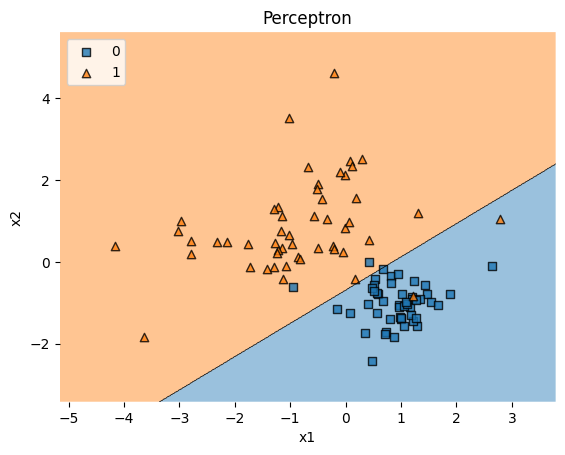

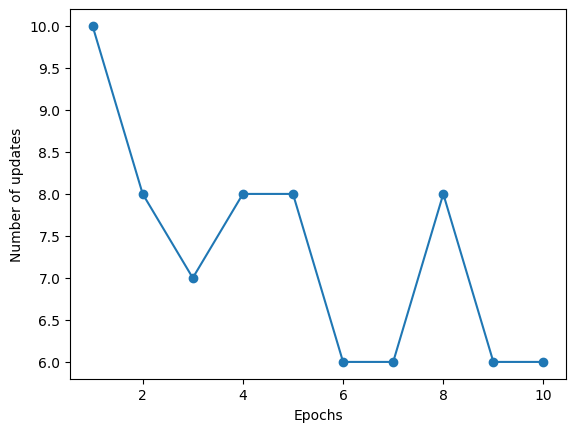

In [4]:
X, y = create_dataset(random_state=999)
rb = RosenblattPerceptron(epochs=10)

rb.train(X, y)
print('Weights: %s' % rb.weights)
plot_decision_regions(X, y, clf=rb)
plt.title('Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(rb.errors) + 1), rb.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Run multiple experiments

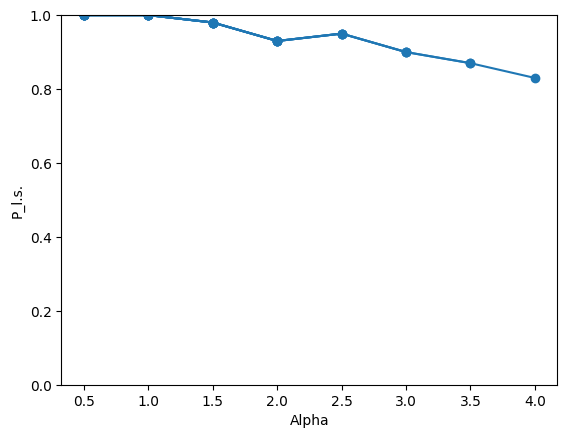

In [17]:
n_experiments = 100
n_dim = 2
P = [i for i in range(1, 9)]
#print(P)
#P = range(1,2)
alpha = []
Pls = []

for p in P:
    alpha.append(p/n_dim)
    success = 0
    #print(alpha)
    for i in range(n_experiments):
        X, y = create_dataset(random_state=i, n_samples=p)
        rb = RosenblattPerceptron(epochs=10)
        rb.train(X, y)
        
        predictions = rb.predict(X)
        # print(predictions)
        # print(y)
        if np.array_equal(predictions, y):
            success += 1
        
        # print('Weights: %s' % rb.weights)
        # plot_decision_regions(X, y, clf=rb)
        # plt.title('Perceptron')
        # plt.xlabel('x1')
        # plt.ylabel('x2')
        # plt.legend(loc='upper left')
        # plt.show()
    Pls.append(success/n_experiments)       # calculate proportion success
    
    plt.plot(alpha, Pls, 'tab:blue', marker='o')
    plt.xlabel('Alpha')
    plt.ylabel('P_l.s.')
    plt.ylim([0, 1])
    
    
    